In [1]:
#  Load the "autoreload" extension so that code can change
%load_ext autoreload
%reload_ext autoreload
from pathlib import Path

#  always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import sys
sys.path.append('../')
from src.imports import *
from src.data.download_data import *
from src.data.fire_data import *
from src.data.read_data import *
from src.gen_functions import *
from src.features.dataset import Dataset
from src.features.build_features import *
from src.models.train_model import *
from src.visualization.vis_data import *
import seaborn as sns
output_notebook()
plt.rcParams.update({'font.size': 14})

Loading BokehJS ...

In [35]:
# start building dataset from scratch only perform this when new data files are added 
dataset = Dataset('Da Nang')
dataset.build_all_data( build_fire=True, build_holiday = True)

Averaging data from 1 stations


100%|████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 1880.04it/s]

Loading all hotspots data. This might take sometimes



100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:48<00:00,  1.61s/it]


before drop (2846891, 20)
after drop (2803255, 12)


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:29<00:00,  1.02it/s]


before drop (2846891, 20)
after drop (2803255, 12)
Getting holiday for  vietnam


# Vis Data

In [36]:
# init the data and load saved process data 
dataset = Dataset('Da Nang')
dataset.load_()
# merge pollution data with other data except fire
dataset.feature_no_fire()

pollutants to plot Index(['PM2.5'], dtype='object')


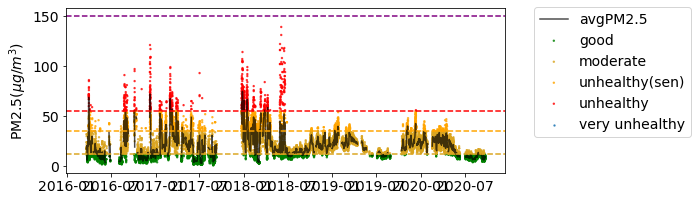

In [4]:
# plot the raw data
plot_all_pollutions(dataset.poll_df, city_name=dataset.city_name)
plt.legend(bbox_to_anchor=(1.05, 1.05) )

Text(0, 0.5, 'number of hotspots/day')

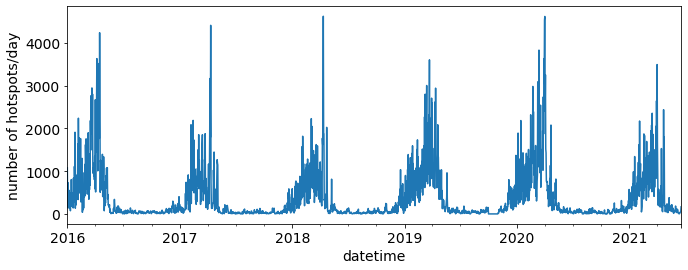

In [5]:
plt.figure(  figsize=(11, 4))
dataset.fire.resample('d').count().loc['2016':, 'count'].plot()
plt.ylabel('number of hotspots/day')

PM2.5    158.869565
dtype: float64


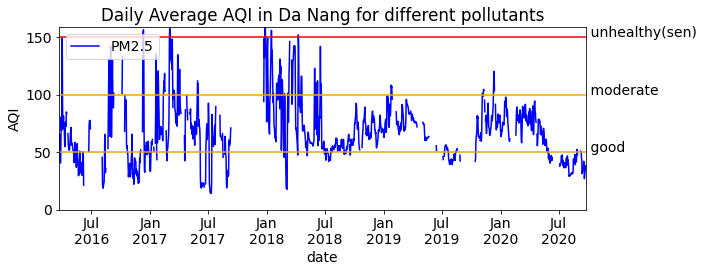

In [6]:
plot_polls_aqi(dataset.poll_df.copy(), dataset.roll_dict, dataset.city_name, filename=dataset.report_folder + 'all_pol_aqi.png' )

In [40]:
khonkaen = read_his_xl(glob('../data/aqm_hourly2/(46t)*')[0])

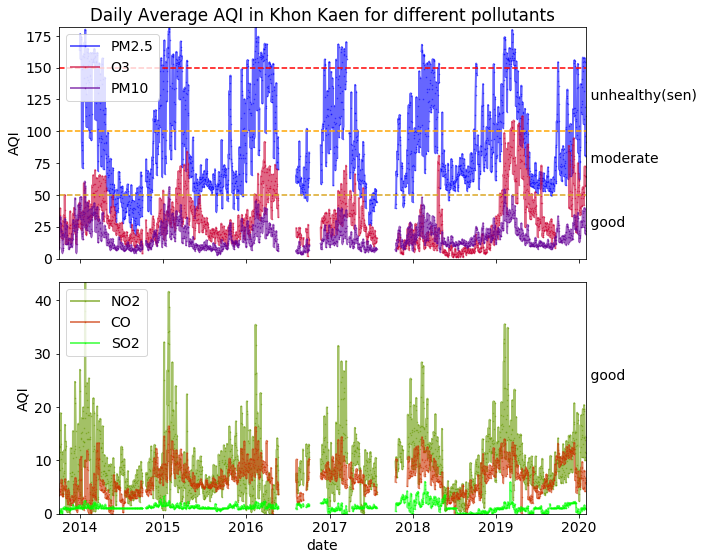

In [42]:
# compare with the data from Khon Kaen which is 600 km away
plot_polls_aqi(khonkaen.copy(), dataset.roll_dict, 'Khon Kaen')

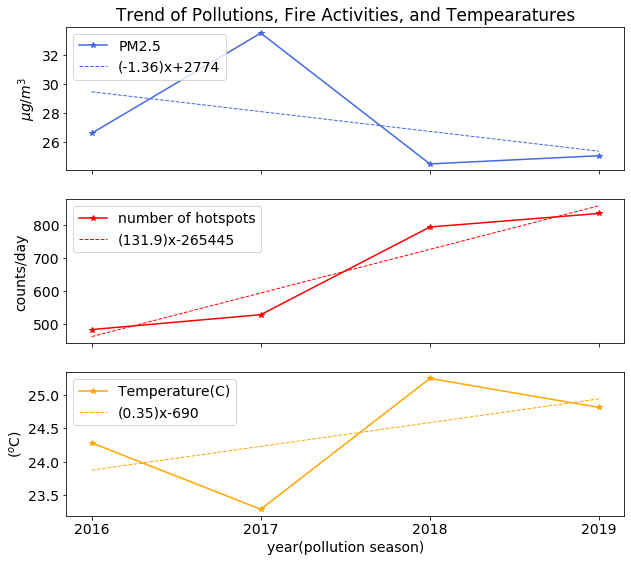

In [17]:
ax, year_avg = plot_yearly_ln(dataset, filename=dataset.report_folder + 'compare_ln_trends.png', min_year=2016)

aqi 100 in  10-06 to 04-01


(0, 155)

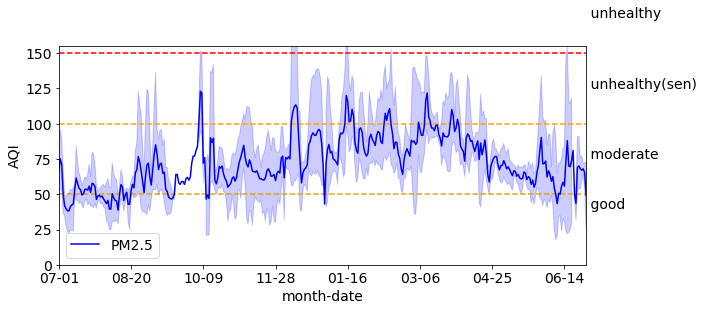

In [32]:
plot_season_aqi(dataset.poll_df.copy(), dataset.roll_dict, 'PM2.5')
plt.ylim([0, 155])
plt.savefig(dataset.report_folder + 'seasonal_pattern_PM25.png')

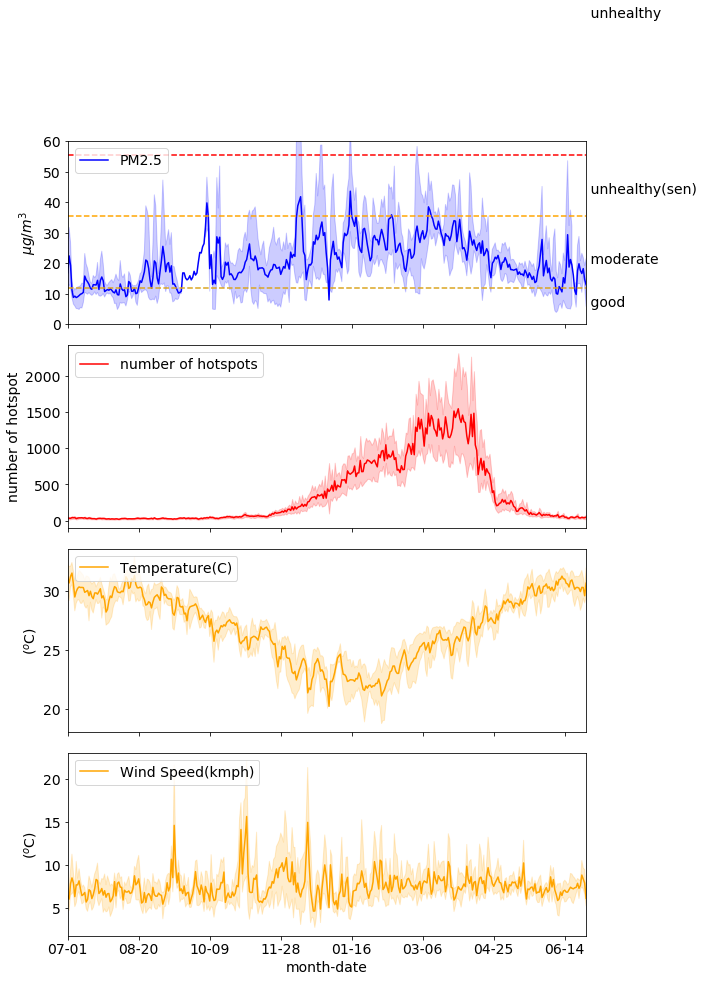

In [33]:
ax = compare_seson_avg(dataset, agg='mean')
ax[0].set_ylim([0, 60])

plt.savefig(dataset.report_folder + 'fire_PM25_season.png')

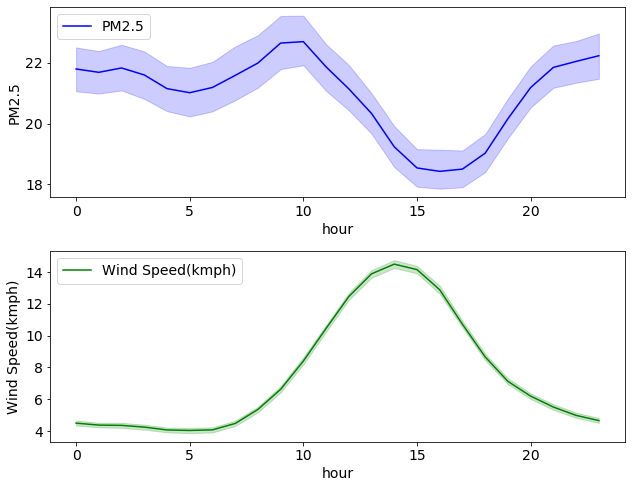

In [20]:
_, ax = plt.subplots(2, 1, figsize=(9, 7))
plot_hour_avg(dataset.poll_df.copy(), 'PM2.5', ax[0],  color='blue')
plot_hour_avg(dataset.wea.copy(), 'Wind_Speed(kmph)', ax[1],  color='green')
plt.tight_layout()

# Train Model

In [38]:
dataset = Dataset('Da Nang')
filename = dataset.model_folder + 'PM25_model_meta.json'
model_meta = load_meta(filename)
model_meta['rolling'] = 1
model_meta['cat_hour'] = 0
model_meta['cat_month'] = 0
model_meta['split_lists'] = [[0.55, 0.2, 0.25], [0.55, 0.2, 0.25], [0.75, 0.25]]
model_meta['zone_list'] = [0, 75, 300, 700,  1000]
save_meta(filename, model_meta)

=================find the best RF model=================
best rf score  -0.21783115318570853
val score after op_rf {'val_r2_score': 0.039, 'val_r2': 0.3902, 'val_mean_squared_error': 73.2115, 'val_mean_absolute_error': 6.7154, 'val_mean_absolute_percentage_error': 34.9375, 'val_median_absolute_error': 5.0647}
test score after op_rf {'test_r2_score': 0.0197, 'test_r2': 0.4647, 'test_mean_squared_error': 76.4007, 'test_mean_absolute_error': 7.1411, 'test_mean_absolute_percentage_error': 48.4021, 'test_median_absolute_error': 6.2592}


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

================ remove unncessary columns no lag=================


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:52<00:00,  5.25s/it]


score after dropping columns  {'r2_score': 0.039, 'r2': 0.3902, 'mean_squared_error': 73.2115, 'mean_absolute_error': 6.7154, 'mean_absolute_percentage_error': 34.9375, 'median_absolute_error': 5.0647}
export figure as  C:/Users/Benny/Documents/Fern/aqi_thailand2/reports/da_nang/_PM25_rf_fea_op2.png
================= find the best fire feature ===================
optimizing fire parameter using skopt optimizer. This will take about 20 mins
new fire parameter {'w_speed': 20.0, 'shift': 72, 'roll': 185, 'damp_surface': 4.9, 'wind_damp': 0, 'wind_lag': 1, 'split_direct': 0} give score = 60.462612602913715
op fire give val score {'val_r2_score': 0.2064, 'val_r2': 0.46, 'val_mean_squared_error': 60.4626, 'val_mean_absolute_error': 6.2265, 'val_mean_absolute_percentage_error': 31.7251, 'val_median_absolute_error': 4.8502}
op fire give test score {'test_r2_score': 0.1138, 'test_r2': 0.5289, 'test_mean_squared_error': 69.0649, 'test_mean_absolute_error': 6.7092, 'test_mean_absolute_percentage_

100%|██████████████████████████████████████████████████████████████████████████████| 360/360 [1:22:15<00:00, 13.71s/it]


score after dropping columns  {'r2_score': 0.3986, 'r2': 0.5754, 'mean_squared_error': 46.173, 'mean_absolute_error': 5.3049, 'mean_absolute_percentage_error': 25.7933, 'median_absolute_error': 3.8716}
best rf score  -0.15223691357122615
val score after op6 {'val_r2_score': 0.3643, 'val_r2': 0.562, 'val_mean_squared_error': 48.8018, 'val_mean_absolute_error': 5.4443, 'val_mean_absolute_percentage_error': 27.3159, 'val_median_absolute_error': 4.0297}
test score after op6  {'testop6_r2_score': 0.0381, 'testop6_r2': 0.4802, 'testop6_mean_squared_error': 75.2566, 'testop6_mean_absolute_error': 7.0354, 'testop6_mean_absolute_percentage_error': 47.096, 'testop6_median_absolute_error': 6.1774}
final score for test set {'test_r2_score': 0.1822, 'test_r2': 0.5403, 'test_mean_squared_error': 63.979, 'test_mean_absolute_error': 6.4402, 'test_mean_absolute_percentage_error': 43.6882, 'test_median_absolute_error': 5.6541}
daily avg score for test set {'avg_test_r2_score': 0.1987, 'avg_test_r2': 0.5

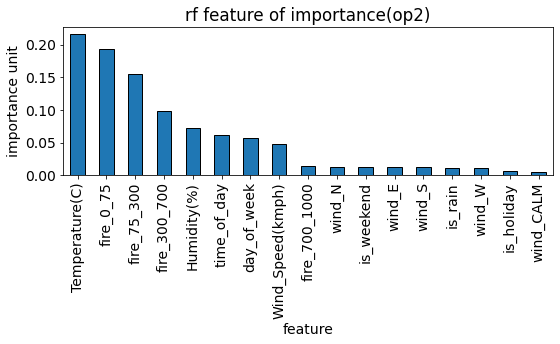

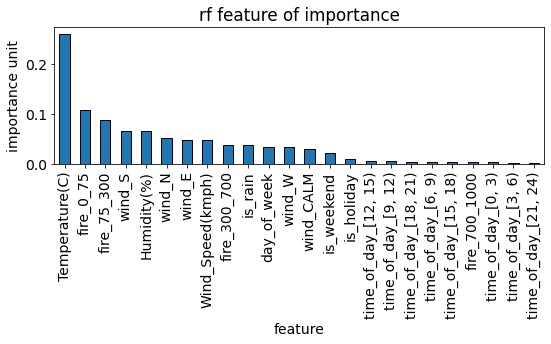

In [39]:
%%time
dataset, model, trainer = train_city_s1(city='Da Nang', pollutant= 'PM2.5', instr='MODIS', add_weight=True, op_fire_zone=True, op_lag=True, choose_cat_hour=True, choose_cat_month=False)

In [40]:
dataset, model, fire_cols, zone_list, feat_imp, roll_win = load_model(city='Da Nang', pollutant='PM2.5')

raw model performance {'test_r2_score': 0.1682, 'test_r2': 0.5397, 'test_mean_squared_error': 65.1043, 'test_mean_absolute_error': 6.4967, 'test_mean_absolute_percentage_error': 44.9337, 'test_median_absolute_error': 5.7679}
daily avg training error {'avg_trn_r2_score': 0.9822, 'avg_trn_r2': 0.9936, 'avg_trn_mean_squared_error': 2.7382, 'avg_trn_mean_absolute_error': 1.1529, 'avg_trn_mean_absolute_percentage_error': 7.6048, 'avg_trn_median_absolute_error': 0.8122}
daily avg test error {'avg_test_r2_score': 0.1739, 'avg_test_r2': 0.5707, 'avg_test_mean_squared_error': 56.3644, 'avg_test_mean_absolute_error': 6.1053, 'avg_test_mean_absolute_percentage_error': 41.8435, 'avg_test_median_absolute_error': 5.3318}


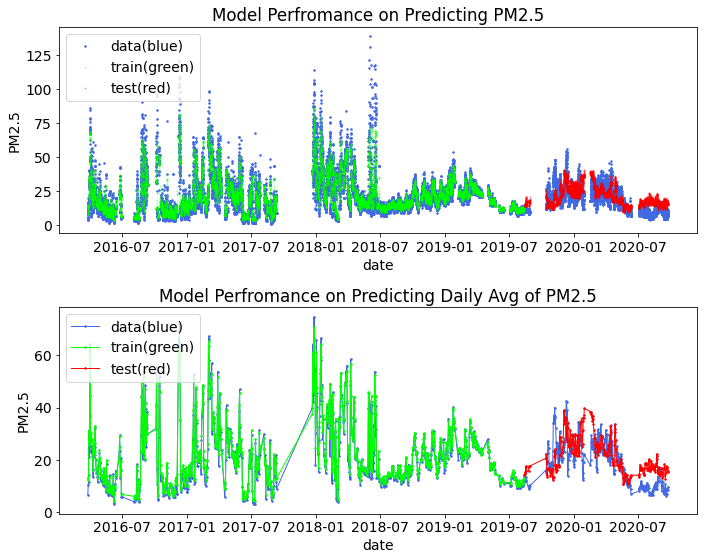

In [41]:
_, df = plot_model_perf(dataset=dataset, model= model, split_list=model_meta['split_lists'][-1], xlim=[], to_save=True)

Model performance vs seasonal pattern and residue

In [42]:
# calculate the average error for the test data
ytest_pred_df = cal_error(dataset, model, data_index=dataset.split_list[1])
ytest_pred_df_avg = ytest_pred_df.resample('d').mean().dropna()

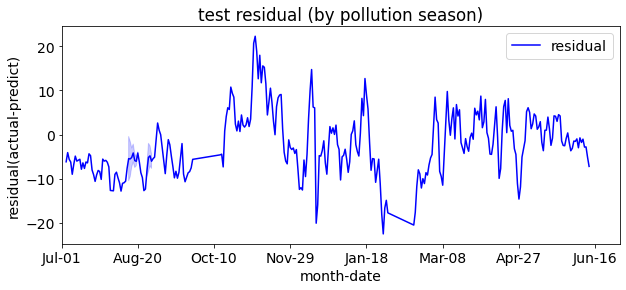

In [43]:
_, ax = plt.subplots(figsize=(10,4))
_ = plot_season_avg(ytest_pred_df, 'residual', ax, plot_error=True, roll=False, agg='mean')
ax.set_title('test residual (by pollution season)')
ax.set_ylabel('residual(actual-predict)')
plt.savefig(dataset.report_folder + 'PM25_season_residual.png', dpi=300 )

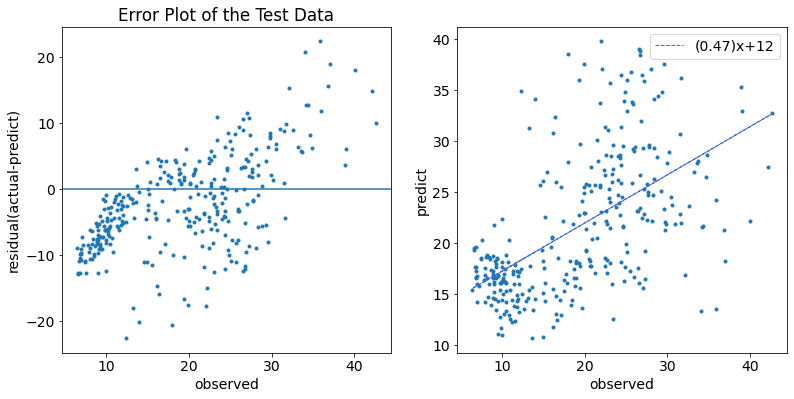

In [44]:
# plot residual vs actual value
_, ax = plt.subplots(1,2, figsize=(13, 6))

ax[0].scatter(ytest_pred_df_avg['actual'], ytest_pred_df_avg['residual'], marker='.')
ax[0].set_ylabel('residual(actual-predict)')
ax[0].set_xlabel('observed')
ax[0].axhline(0)
ax[0].set_title('Error Plot of the Test Data')

ax[1].scatter(ytest_pred_df_avg['actual'], ytest_pred_df_avg['pred'], marker='.')
ax[1].set_ylabel('predict')
ax[1].set_xlabel('observed')
#ax[1].set_title('Error Plot of the Test Data')
s = ytest_pred_df_avg['pred']
s.index = ytest_pred_df_avg['actual']
add_ln_trend_line(s, ax=ax[1])
ax[1].legend()
plt.savefig(dataset.report_folder + 'PM25_residual.png', dpi=300 )